# Clustering (Stroll Map)

<font size = 3>https://reurl.cc/MvE5GX</font>

# 載入常用程式庫

In [1]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '\\Google Drive\\adventures\\'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
# import gdown
import requests
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'figure\\clustering\\'
data_dir = groot_dir + 'clustering\\'

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)
    
def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
        
def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0  
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]   
    return s

print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage points to ==>', data_dir)

print('\nThis module is amied to leran clustering basics...') 
print('\nLibraries and dependenciess imported')
print_now()


Running on win32
Python Version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Data storage points to ==> C:\Users\TyKA\Google Drive\adventures\clustering\

This module is amied to leran clustering basics...

Libraries and dependenciess imported
2021-05-30 15:18:13.617164


## 建立繪圖框公式

### Start_plot
### Grid_plot

In [2]:
def start_plot(figsize=(10, 8), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1,1)
    # plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

def grid_plot(figsize=(18, 14), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    # plt.tight_layout()
    gs=fig.add_gridspec(2, 2)
    with sns.axes_style(style):
        ax0 = fig.add_subplot(gs[0,0])
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[1,0])  
        ax3 = fig.add_subplot(gs[1,1]) 
    return [ax0, ax1, ax2, ax3]


# Download File 下載資料到硬碟

In [7]:
fetch_file_via_requests(
    DropboxLink('teqrg5e5nyxpd59', 'Mall.csv'), data_dir )

# fetch_file_via_requests(
#     DropboxLink('2j1vjne1e8sdgr1', 'coffee5.csv'), data_dir )

fetch_file_via_requests(
    DropboxLink('qbaykxstu537u54', 'Clustering_gmm.csv'), data_dir )

fetch_file_via_requests(
    DropboxLink('l3o97cclfs7nw4j', 'coffee6.csv'), data_dir )


'C:\\Users\\TyKA\\Google Drive\\adventures\\clustering\\coffee6.csv'

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

coord = ["Longitude", "Latitude"]

# Hierarchical Agglomerative Clustering

- [sklearn AllgomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

### 將"Mall.csv"數據載入DataFrame

In [4]:
mallfile = os.path.join(data_dir, "Mall.csv")
mall = pd.read_csv(mallfile)
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 建立mdf DataFrame
* mdf 數據取自mail_dataframe中的最後兩項，對應column name分別是 X1 & X2

In [5]:
mdf = pd.DataFrame(
    data = mall.iloc[:, -2:].values,
    columns = ["X1", "X2"]
)
mdf.head()

,X1,X2
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


* 簡易繪製散佈圖確認

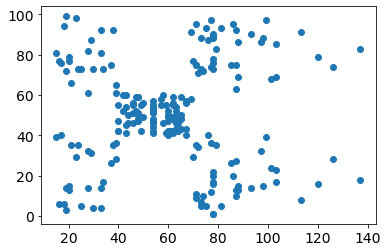

In [6]:
plt.scatter(mdf.X1, mdf.X2)

### 用 scipy 製作 dendogram




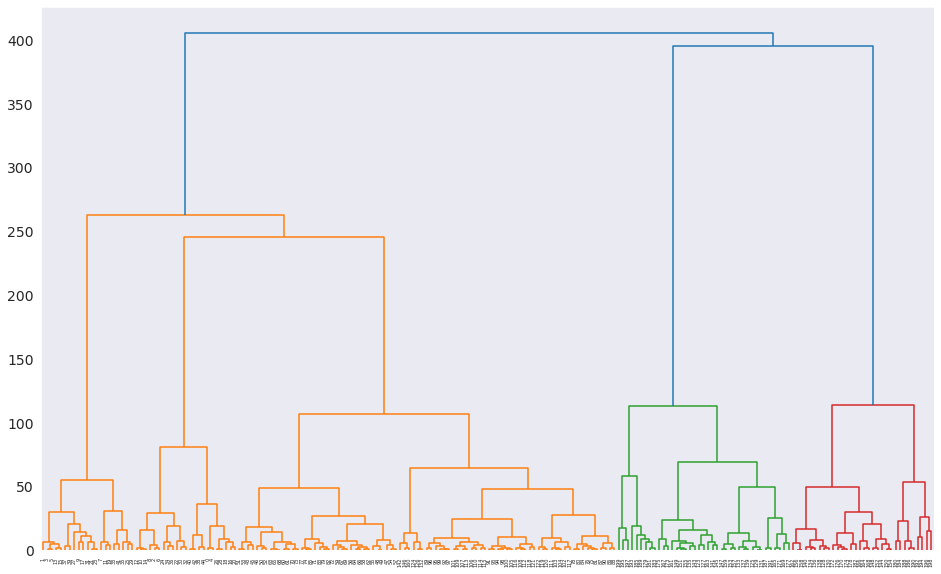

In [7]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cut_tree, linkage

hc = sch.linkage(mdf.values, method="ward")
ax = start_plot(style="dark", figsize = (16, 10))
dendrogram = sch.dendrogram(hc, ax = ax)

### scikit-learn 的做法

In [8]:
from sklearn.cluster import AgglomerativeClustering

n_k = 5
model = AgglomerativeClustering(n_clusters=n_k,
                                linkage="ward")
model.fit(mdf.values)
labels = model.labels_


In [9]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

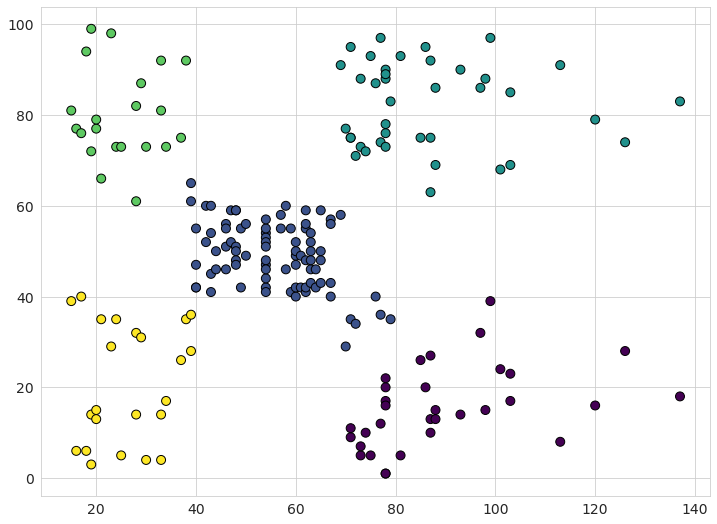

In [10]:
ax = start_plot(figsize=(12, 9), style = "whitegrid")
ax.scatter(mdf.X1, mdf.X2, c = labels, cmap = "viridis", edgecolor = "k", s = 80)

### Comparison of Linkages （距離計算方式的比較）

* Note: 4種 linkage，分別是"ward", "complete", "average", "single"

In [11]:
%%time

linkages = ["ward", "complete", "average", "single"]
hlabels = np.zeros((4, len(mdf)), dtype = np.int)
for i in range(len(linkages)):
    model = AgglomerativeClustering(n_clusters=5, 
                                    linkage=linkages[i])
    model.fit(mdf.values)
    hlabels[i] = model.labels_

Wall time: 4.99 ms


In [12]:
hlabels.shape

(4, 200)

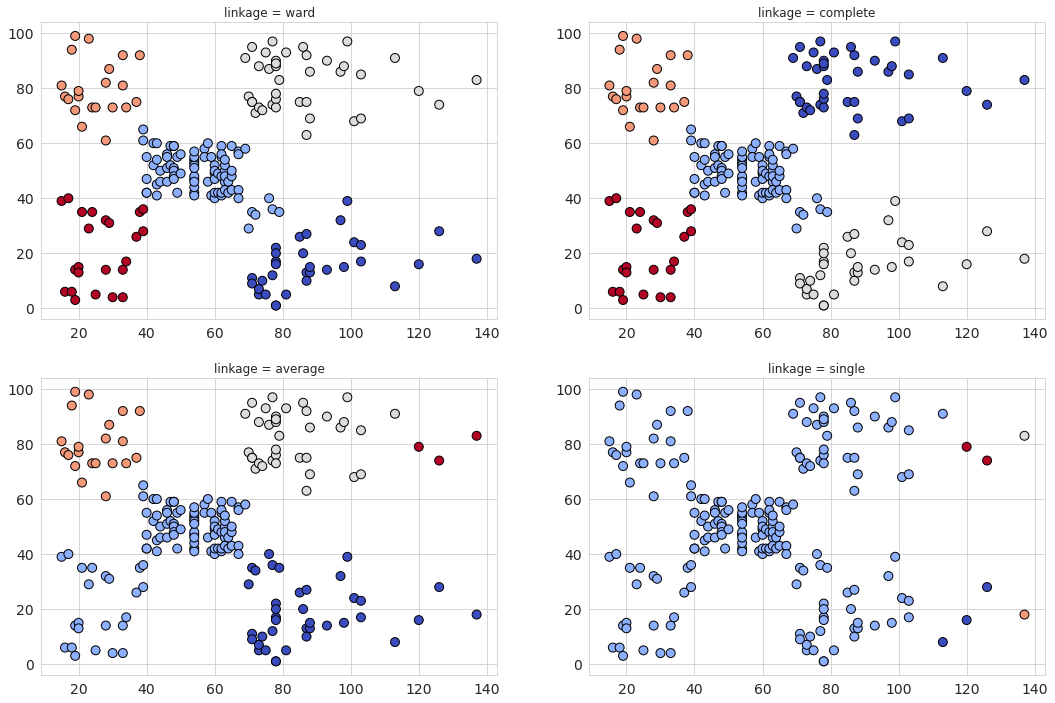

In [13]:
ax = grid_plot(figsize = (18, 12), style = "whitegrid")

for i in range(len(linkages)):
    ax[i].scatter(x = mdf.X1, y = mdf.X2, c = hlabels[i], cmap = "coolwarm", edgecolor = "k", s = 80)
    ax[i].set_title("linkage = %s" %linkages[i])

# 咖啡漫步地圖

 - 發想源起 [Using Unsupervised Learning to plan a vacation to Paris: Geo-location clustering](https://towardsdatascience.com/using-unsupervised-learning-to-plan-a-paris-vacation-geo-location-clustering-d0337b4210de)
- [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula#:~:text=The%20haversine%20formula%20determines%20the,and%20angles%20of%20spherical%20triangles.)

* 讀取 coffee6.csv 存入 df 

In [3]:
df = pd.read_csv(os.path.join(data_dir, "coffee6.csv"))
df.head()

,Shop,Latitude,Longitude
0,Louisa南崁店,25.049920,121.292720
1,四季芳庭,25.047673,121.294551
2,Louisa 台茂店,25.053981,121.288592
3,星巴克台茂店,25.053283,121.288592
4,星巴克南崁店,25.049547,121.291974


* 從 df 中擷取出經緯度

In [4]:
coord = ["Longitude", "Latitude"]
cafe = df[coord].values

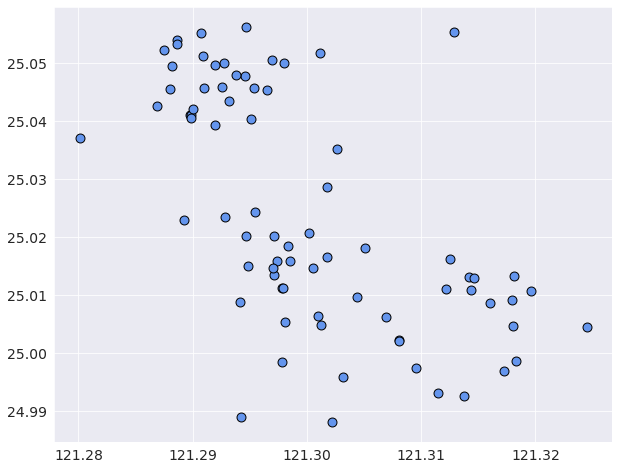

In [16]:
ax = start_plot(figsize = (10, 8), style = "darkgrid")
ax.scatter(cafe[:, 0], cafe[:, 1], s = 80, edgecolor = "k", c = "cornflowerblue")


# K-Means

In [17]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
labels = model.fit_predict(cafe)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 2, 1, 3, 0, 0, 1, 1, 0,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 3])

In [18]:
centroids = model.cluster_centers_
centroids

array([[121.29279513,  25.04679987],
       [121.30427457,  24.99932964],
       [121.31673962,  25.00846638],
       [121.29745847,  25.01757526]])

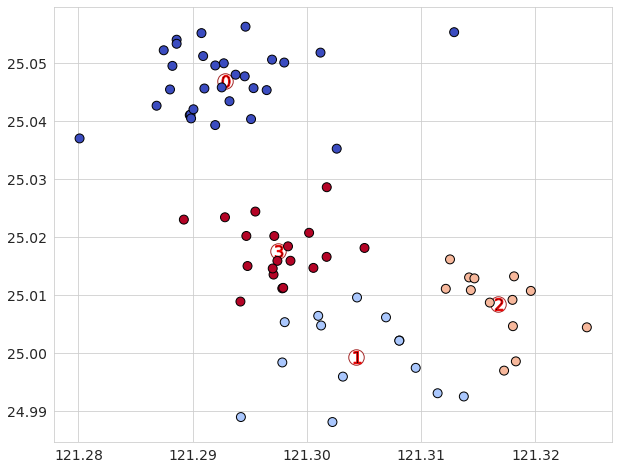

In [20]:
ax = start_plot()
ax.scatter(cafe[:, 0], cafe[:, 1], s = 80, c = labels, edgecolor = "k", zorder = 2, cmap = "coolwarm")
ax.scatter(centroids[:, 0], centroids[:, 1], c = "white", s = 240, edgecolor = "brown")

for i, c in enumerate(centroids):
    ax.scatter(c[0], c[1], marker = "$%d$" %i, s = 150, c = "k", edgecolor = "r")

In [24]:
df = pd.read_csv(os.path.join(data_dir, "Mall.csv"))
X = df.iloc[:, -2:].values
n_k = 6
seed = 1

models = [
    KMeans(n_clusters=n_k, init="random", algorithm="full", max_iter=i+1, random_state=seed, n_init=1)
    for i in range(3)
]

lbls = [model.fit_predict(X) for model in models]

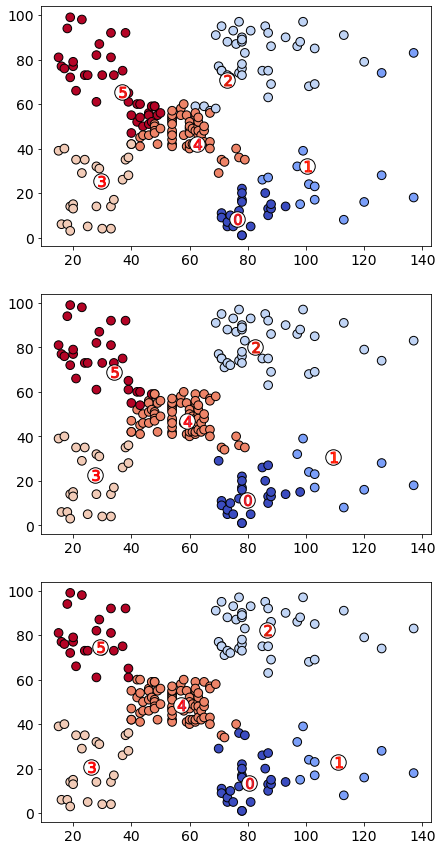

In [25]:
fig, ax = plt.subplots(3, 1, figsize = (7, 15))

for i in range(3):
    ax[i].scatter(X[:, 0], X[:, 1], s = 75, c = lbls[i], edgecolor = "k", cmap = "coolwarm")
    centroids = models[i].cluster_centers_
    ax[i].scatter(centroids[:, 0], centroids[:, 1], s = 240, marker = "o", c = "w", edgecolor = "k")
    
    for j, c in enumerate(centroids):
        ax[i].scatter(c[0], c[1], marker = "$%d$" %j, s = 120, edgecolor = "r")

- [sklearn KMeans API](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)
- [Understanding K-Means, K-Means++ and, K-Medoids Clustering Algorithms](https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca)

### Decision Bundary of KMeans

- [countour](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html)
- [countourf](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf)
- [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
 - [例圖](https://i.stack.imgur.com/LsjwA.png)

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
model = KMeans(n_clusters=9)
model.labels_

In [5]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def cafe_boundries(model, data, resolution = 1000,
    plot_centroids = False,
    figsize=(12,10), style='whitegrid'):

    mins = data.min(axis=0) - 0.01
    maxs = data.max(axis=0) + 0.01
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = start_plot(figsize=figsize, style = style)
    
    ax.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel1", alpha = 0.2)
    ax.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k', alpha = 0.6)

    # labels = model.predict(data)
    labels = model.labels_
    ax.scatter(data[:,0], data[:,1], c = labels,
        cmap = 'coolwarm', edgecolor='navy', s=75)
    
    centroids = model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker = 'o',
        s = 220, edgecolor = 'k', c = 'w')
    for i, c in enumerate(centroids):
        ax.scatter(c[0], c[1], marker = '$%d$' % i,
            s = 80, edgecolor = 'r')


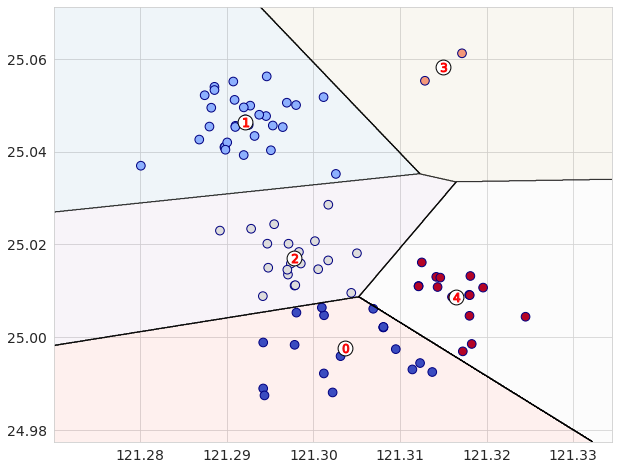

In [ ]:
n_k = 5
df = pd.read_csv(os.path.join(data_dir, 'coffee7.csv'))
X = df[coord].values
model = KMeans(n_clusters = n_k).fit(X)
cafe_boundries(model, X, style = 'whitegrid', figsize=(10, 8),
    plot_centroids = True)


# Elbow Method


- inertia_: 

    float, Sum of squared distances of samples to their closest cluster center.

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(cafe)

KMeans(n_clusters=4)

In [7]:
model.score(cafe)

-0.004196866814152378

In [8]:
model.inertia_

0.004196866814152376

In [13]:
kmodels= [
    KMeans(n_clusters=k).fit(cafe)
    for k in range(2, 10)
]

scores = [model.inertia_ for model in kmodels]

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


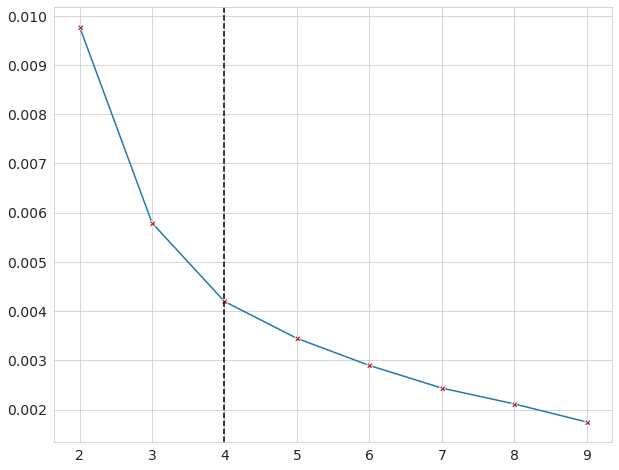

In [15]:
ax = start_plot()
sns.lineplot(range(2, 10), scores, ax = ax, mfc = "brown", marker = "X")
ax.axvline(x = 4, ls = "--", c = "k")
# output_fig("elbow - coffee map.png")


# Silhouette scores

$s(x_i) = \frac{ b(x_i) - a(x_i)}{ \max \{ a(x_i), b(x_i) \}} , \ it\ is\ clear\ that\ -1 \le s(x_i) \le 1$

輪廓係數法的概念是「找出同群資料點內最近/不同群越分散」的值，也就是滿足 Cluster 的定義，b為不同群之間的點平均距離，a為同群之間的距離。S越大越好，代表分得越清楚。

- [sklearn silhouette_samples](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples)
- [sklearn silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
- [silhouette analysis source code](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)
- [Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

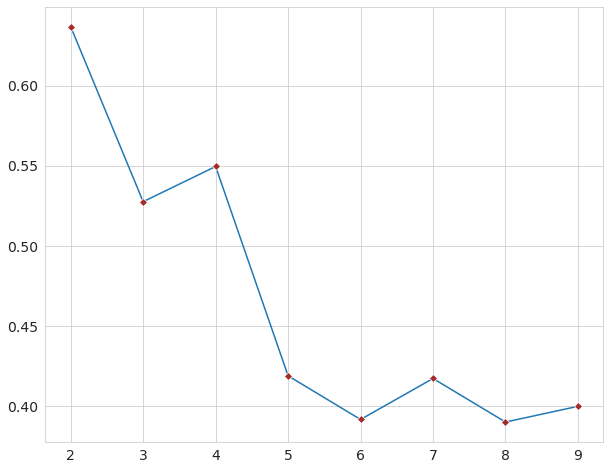

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
savg = []

for n in range(2, 10):
    model = KMeans(n_clusters=n)
    labels = model.fit_predict(cafe)
    sil_avg = silhouette_score(cafe, labels)
    savg.append(sil_avg)

ax = start_plot()
sns.lineplot(range(2, 10), savg, marker = "D", mfc = "brown")

# DBSCAN
- [DBSCAN demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

In [4]:
from sklearn.cluster import DBSCAN

df = pd.read_csv(os.path.join(data_dir, "coffee6.csv"))
coord = ["Longitude", "Latitude"]
cafe = df[coord].values

In [5]:
model = DBSCAN(eps = 0.005, min_samples=4)
labels = model.fit_predict(cafe)

In [6]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1, -1, -1,  1,  1,  1,
        2,  1,  1,  1,  3,  3,  3,  3,  3, -1,  3,  1,  3,  1,  3,  2,  2,
        3,  3,  3,  3,  3,  2,  3,  1,  4,  3, -1,  0, -1, -1, -1,  2,  2,
        4,  3, -1, -1, -1,  3,  4,  3], dtype=int64)

In [10]:
n_cluster_ = len(set(labels)) - \
    (1 if -1 in set(labels) else 0)
n_noise_ = list(labels).count(-1)
print("%d estimated clusters" %n_cluster_)
print("%d estimated noises" %n_noise_)

5 estimated clusters
12 estimated noises


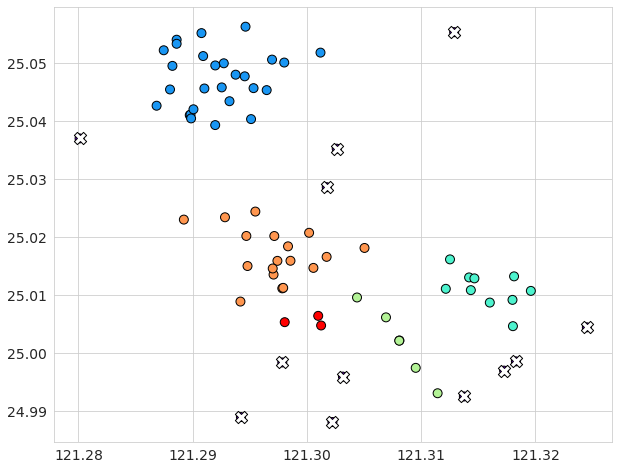

In [11]:
labels = np.array([x+1 for x in model.labels_])
ax = start_plot()
ax.scatter(cafe[:, 0], cafe[:, 1], s= 80, edgecolor = "k", c = labels, cmap = plt.cm.rainbow)
for c, p in zip(labels, cafe):
    if c != 0:
        continue
    ax.scatter(p[0], p[1], marker = "X", color = "w", s = 150, edgecolor = "k")

In [9]:
n_cluster_

6

In [12]:
labels = np.array([x+1 for x in model.labels_])
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 3, 2, 2, 2, 4, 4, 4, 4, 4, 0,
       4, 2, 4, 2, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 2, 5, 4, 0, 1, 0, 0, 0,
       3, 3, 5, 4, 0, 0, 0, 4, 5, 4], dtype=int64)

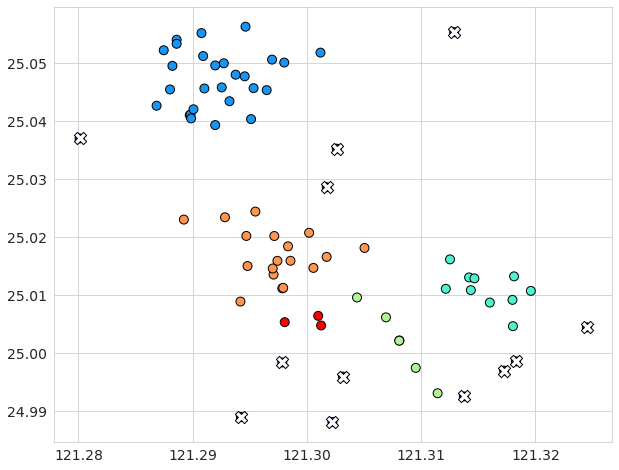

In [17]:
ax = start_plot()
ax.scatter(cafe[:, 0], cafe[:, 1], s= 80, edgecolor = "k", c = labels, cmap = "rainbow")
for c, p in zip(labels, cafe):
    if c != 0:
        continue
    ax.scatter(p[0], p[1], c = "w", marker = "X", s = 150, edgecolor = "k")

### plot_dbscan

In [17]:
from sklearn.cluster import DBSCAN

def plot_dbscan(data, max_distance = 0.005, 
    min_samples = 5, 
    ax=None):
    if ax is None:
        ax = start_plot(figsize = (10, 8), style = 'darkgrid')

    max_distance = max_distance
    min_samples = min_samples

    db = DBSCAN(eps=max_distance, min_samples=min_samples).fit(data)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # plt.tight_layout()
    # core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    X = data

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]  
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='navy', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=7, 
                label = 'k = %d' % k if k != -1 else 'noise point')
    ax.set_title('DBSCAN on Coffe Map: estimated cluster = %d' % n_clusters_)
    ax.legend(title = 'eps=%.3f min_samples=%d' % (max_distance, min_samples),
            title_fontsize = 13, fontsize = 13,
            loc = 'best', shadow = True)

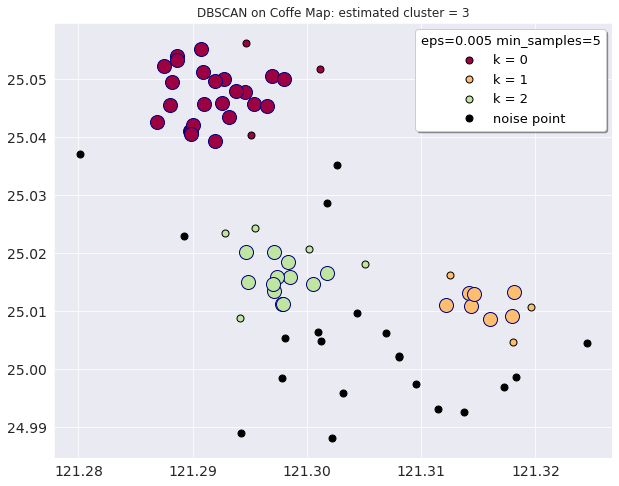

In [18]:
plot_dbscan(cafe)

# Kernelized KMeans - SpectralClustering

- [cluster.SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html?highlight=spectralclustering#sklearn.cluster.SpectralClustering)

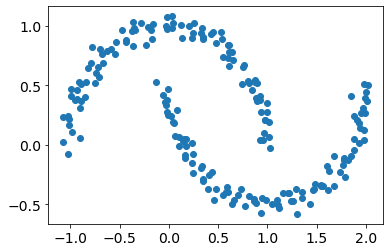

In [19]:
from sklearn.datasets import make_moons
xm, ym = make_moons(200, noise=0.05, random_state=0)
plt.scatter(xm[:, 0], xm[:,1])

In [34]:
rs = np.random.seed(25)

def generate_circle_sample_data(r, n, sigma):
    """
    Generate circle data with random Gaussian noise.
    """
    angles = np.random.uniform(low = 0, high = 2*np.pi, size = n)
    
    x_epsilon = np.random.normal(loc = 0, scale = sigma, size = n)
    y_epsilon = np.random.normal(loc = 0, scale = sigma, size = n)
    
    x = r*np.cos(angles) + x_epsilon
    y = r*np.sin(angles) + y_epsilon
    return x, y

def concentric_circles_data(alpha):
    x1, y1 = generate_circle_sample_data(2, 1000, alpha)
    x2, y2 = generate_circle_sample_data(4, 1000, alpha)
    x3, y3 = generate_circle_sample_data(6, 1000, alpha)
    x = np.append(np.append(x1, x2), x3)
    y = np.append(np.append(y1, y2), y3)
    df = pd.DataFrame({"x": x, "y": y})
    return df.values

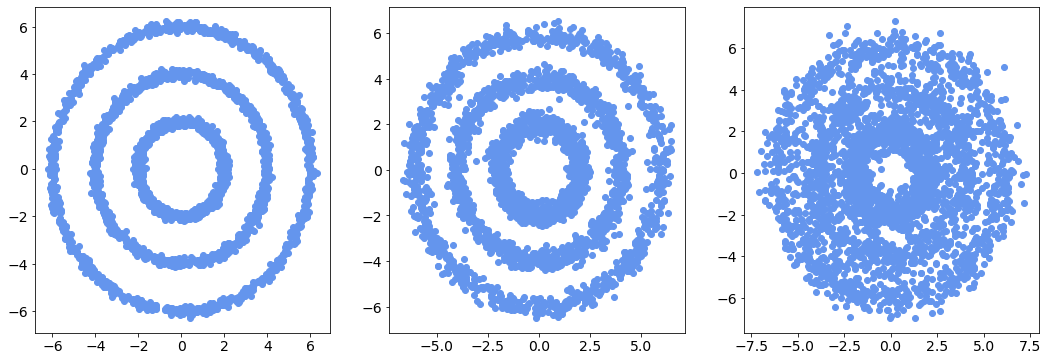

In [35]:
alphas = [0.1, 0.25, 0.5]

fig, ax = plt.subplots(1, 3, figsize = (18, 6))
for i in range(3):
    data = concentric_circles_data(alpha=alphas[i])
    ax[i].scatter(data[:, 0], data[:, 1], c = "cornflowerblue")

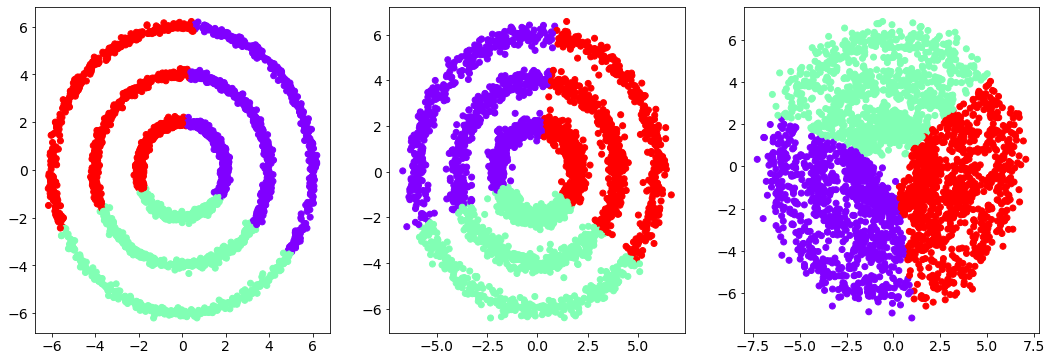

In [36]:
from sklearn.cluster import KMeans
alphas = [0.1, 0.25, 0.5]

fig, ax = plt.subplots(1, 3, figsize = (18, 6))
for i in range(3):
    data = concentric_circles_data(alpha=alphas[i])
    model = KMeans(n_clusters=3).fit(data)
    labels = model.labels_
    ax[i].scatter(data[:, 0], data[:, 1], c = labels, cmap = plt.cm.rainbow)

C:\Users\TyKA\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\TyKA\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


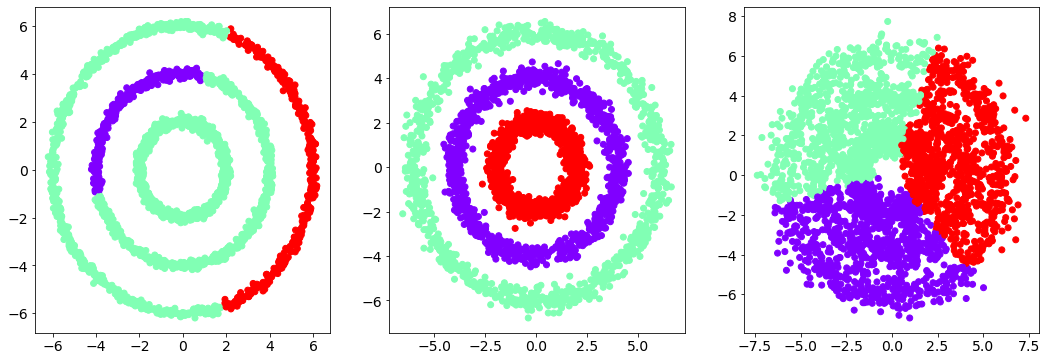

In [37]:
from sklearn.cluster import SpectralClustering
alphas = [0.1, 0.25, 0.5]

fig, ax = plt.subplots(1, 3, figsize = (18, 6))
for i in range(3):
    data = concentric_circles_data(alpha=alphas[i])
    model = SpectralClustering(n_clusters=3, n_neighbors=8, random_state=10, affinity="nearest_neighbors",
                               assign_labels="kmeans").fit(data)
    labels = model.labels_
    ax[i].scatter(data[:, 0], data[:, 1], c = labels, cmap = plt.cm.rainbow)

# GMM

使用 Colab 時，可以連接到本地電腦的 Jupyter Notebook，怎麼做

- 第一步：安裝延伸套件：
```
pip3 install --upgrade jupyter_http_over_ws>=0.0.7
jupyter serverextension enable --py jupyter_http_over_ws
```

- 第二步：
重新啟動 Jupyter，記得參數要寫對喔：
```
jupyter notebook \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 \
  --NotebookApp.port_retries=0 &
```


### get started

In [38]:
df = pd.read_csv(os.path.join(data_dir, "coffee6.csv"))
coord = ["Longitude", "Latitude"]
cafe = df[coord].values

## preidct_proba

In [39]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(cafe)
labels = gmm.predict(cafe)
probs = gmm.predict_proba(cafe)


In [40]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 3, 3, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 2, 2, 3, 3, 2,
       3, 3, 0, 0, 3, 3, 3, 0, 0, 0], dtype=int64)

In [42]:
probs.shape

(76, 4)

In [43]:
probs[:5]

array([[3.37959117e-06, 4.96203065e-30, 9.99996620e-01, 1.03677025e-27],
       [1.40469486e-05, 7.75754779e-27, 9.99985953e-01, 3.72415956e-25],
       [3.14449354e-07, 7.46047708e-36, 9.99999686e-01, 1.40463829e-32],
       [4.51087429e-07, 8.67007959e-35, 9.99999549e-01, 5.61941309e-32],
       [4.30553551e-06, 2.05290074e-29, 9.99995694e-01, 1.20258273e-27]])

In [49]:
np.argsort(probs[0])

array([1, 3, 0, 2], dtype=int64)

In [45]:
a = np.array([x[-1] for x in np.argsort(probs)])

In [46]:
labels - a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
a

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 3, 3, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 2, 2, 3, 3, 2,
       3, 3, 0, 0, 3, 3, 3, 0, 0, 0], dtype=int64)

## file from kaggle

In [51]:
gdf = pd.read_csv(os.path.join(data_dir, "Clustering_gmm.csv"))

In [52]:
data = gdf.values

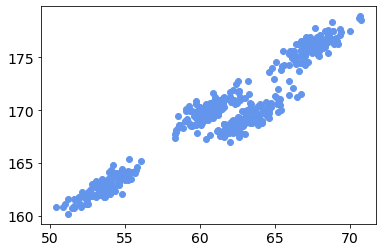

In [54]:
plt.scatter(data[:, 0], data[:, 1], c = "cornflowerblue")

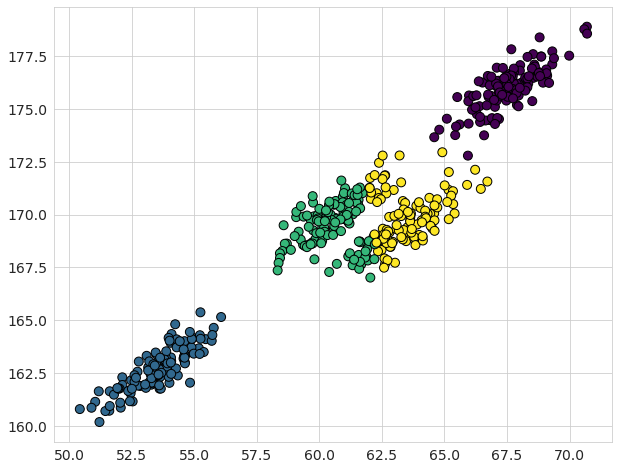

In [55]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4).fit(data)
labels = model.labels_
ax = start_plot()
ax.scatter(data[:, 0], data[:, 1], s = 80, edgecolor = "k", cmap = "viridis", c = labels)

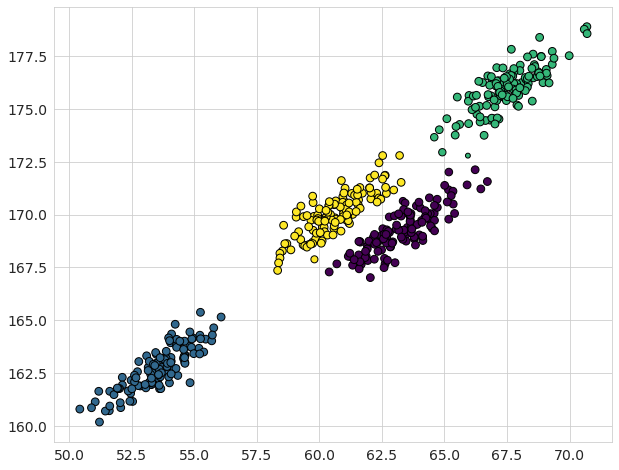

In [58]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, covariance_type="full").fit(data)
labels = gmm.predict(data)
probs = gmm.predict_proba(data)
size = 60 * probs.max(axis = 1) ** 2
ax = start_plot()
ax.scatter(data[:, 0], data[:, 1], s= size, cmap = "viridis", edgecolor = "k", c = labels)

In [64]:
from sklearn.cluster import SpectralClustering
models = [
    KMeans(n_clusters=4),
    GaussianMixture(n_components=4, covariance_type="full"),
    SpectralClustering(n_clusters=4, n_neighbors=8, random_state=42, affinity="nearest_neighbors", assign_labels="kmeans")
]
labels = [model.fit_predict(data) for model in models]
titles = ["KMeans", "GaussianMixture", "SpectralClustering"]

C:\Users\TyKA\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


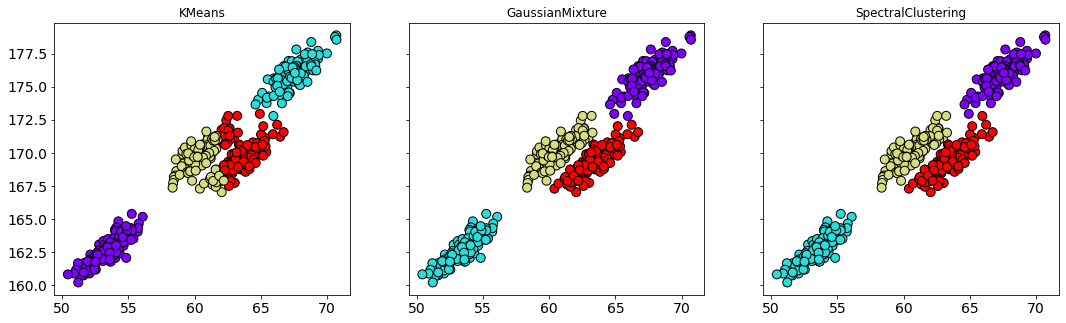

In [65]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharey=True)

for i in range(3):
    ax[i].scatter(data[:, 0], data[:, 1], s= 80, edgecolor = "k", cmap = plt.cm.rainbow, c = labels[i])
    ax[i].set_title(titles[i])

In [ ]:
#
# routines used to draw ellipse and mixture models
#
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
spines_bounds = ['left', 'right', 'bottom', 'top']

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
 
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
 
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def ty_gmm_map(n_k, train_data, ax = plt):

    # bounds = ['left', 'right', 'top', 'bottom']
    train_data = np.array(train_data)

    gmm = GaussianMixture(n_components = n_k).fit(train_data)
    labels = gmm.predict(train_data)
    probs = gmm.predict_proba(train_data)

    size = 60 * probs.max(1) ** 2

    sizelist = [ int(probs[i][labels[i]]*10)* 15+25 for i in range(len(labels))]

        
    ax.scatter(train_data[:,0], 
               train_data[:,1], c=labels, s=size, 
               cmap='viridis', zorder=2, edgecolor = (0, 0, 0))

    ax.set_title('TY Map Mixture Model, clusters = %d' % n_k)
  

    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='o',
                c="white", alpha=1, s=240, edgecolor='k')

    for i, c in enumerate(gmm.means_):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=70, edgecolor='r')
       
    w_factor = 0.2 / gmm.weights_.max()
    for position, covariance, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):       
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
             angle = 0
             width, height = 2 * np.sqrt(covariance)
 
        # Draw the Ellipse
        for nsig in range(1, 4):
            # print('width= %7.3f height=%7.3f angle=%d' % (nsig * width , nsig * height , angle))
            ax.add_patch(Ellipse(position, nsig * width , nsig * height,
                                 angle, alpha = w * w_factor))
      

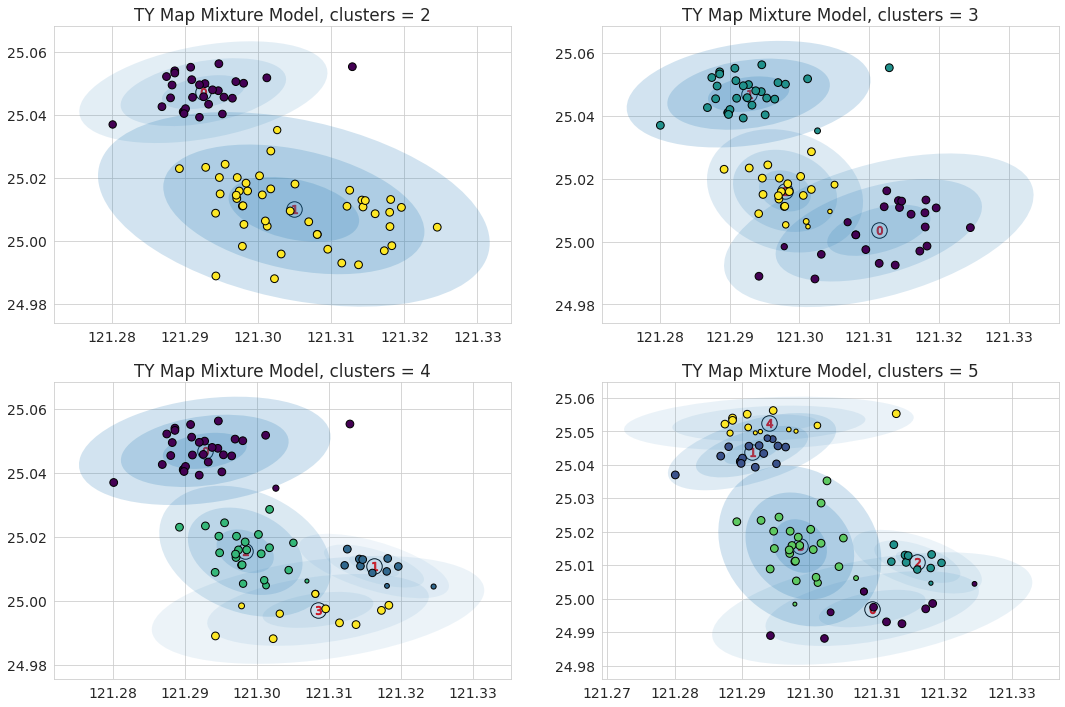

In [ ]:
ax = grid_plot(figsize=(18, 12))

for i in range(4):
    ty_gmm_map(i+2, cafe, ax = ax[i])

# KMean vs. GMM

In [ ]:


#
# routines used to draw ellipse and mixture models
#
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import numpy as np

spines_bounds = ['left', 'right', 'bottom', 'top']

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
 
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
 
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def ty_gmm_map(n_k, train_data, ax = plt):

    # bounds = ['left', 'right', 'top', 'bottom']
    train_data = np.array(train_data)

    gmm = GaussianMixture(n_components = n_k).fit(train_data)
    labels = gmm.predict(train_data)
    probs = gmm.predict_proba(train_data)

    size = 60 * probs.max(1) ** 2

    sizelist = [ int(probs[i][labels[i]]*10)* 15+25 for i in range(len(labels))]

        
    ax.scatter(train_data[:,0], 
               train_data[:,1], c=labels, s=size, 
               cmap='viridis', zorder=2, edgecolor = (0, 0, 0))

    ax.set_title('TY Map Mixture Model, clusters = %d' % n_k)
  

    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='o',
                c="white", alpha=1, s=240, edgecolor='k')

    for i, c in enumerate(gmm.means_):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=70, edgecolor='r')
       
    w_factor = 0.2 / gmm.weights_.max()
    for position, covariance, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):       
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
             angle = 0
             width, height = 2 * np.sqrt(covariance)
 
        # Draw the Ellipse
        for nsig in range(1, 4):
            # print('width= %7.3f height=%7.3f angle=%d' % (nsig * width , nsig * height , angle))
            ax.add_patch(Ellipse(position, nsig * width , nsig * height,
                                 angle, alpha = w * w_factor))
    
def plot_dbscan(data, max_distance = 0.005, 
    min_samples = 5, 
    ax=None):
    if ax is None:
        ax = start_plot(figsize = (10, 8), style = 'darkgrid')

    max_distance = max_distance
    min_samples = min_samples

    db = DBSCAN(eps=max_distance, min_samples=min_samples).fit(data)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # plt.tight_layout()
    # core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    X = data

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]  
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='navy', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=7, 
                label = 'k = %d' % k if k != -1 else 'noise point')
    ax.set_title('DBSCAN on Coffe Map: estimated cluster = %d' % n_clusters_)
    ax.legend(title = 'eps=%.3f min_samples=%d' % (max_distance, min_samples),
            title_fontsize = 13, fontsize = 13,
            loc = 'best', shadow = True)

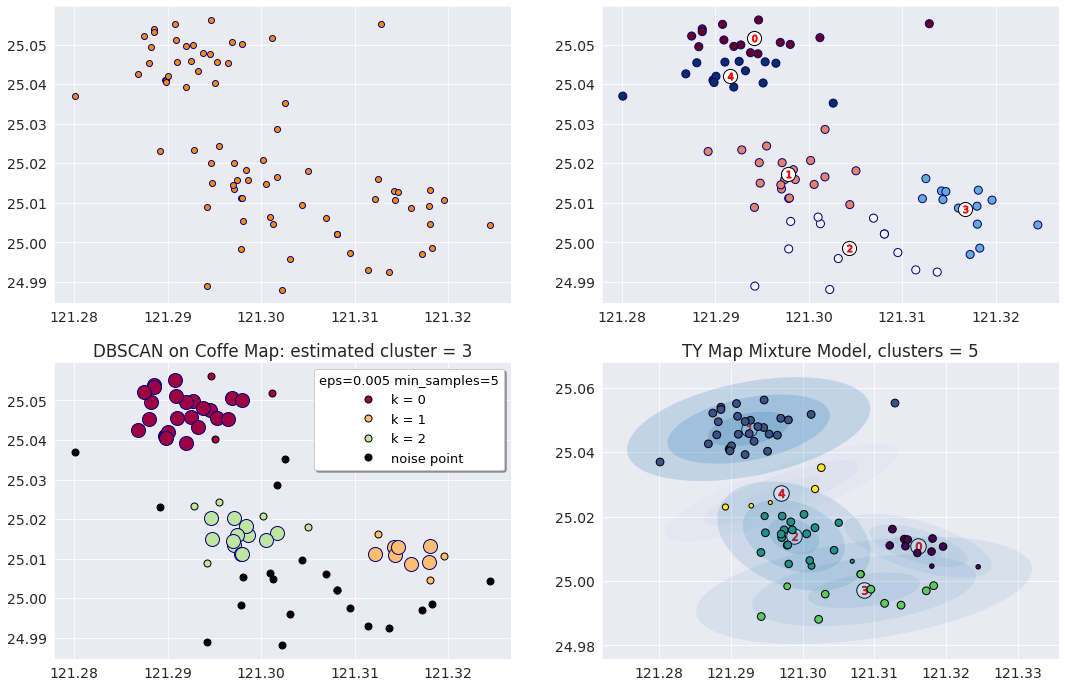

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

cafe_pos = df[coord].values
n_clusters = 5

ax = grid_plot(figsize=(18, 12), style='darkgrid')

ax[0].scatter(cafe_pos[:, 0], cafe_pos[:, 1],
    color = 'darkorange', edgecolor = 'navy')

knn = KMeans(n_clusters=n_clusters)
which_clusters = knn.fit_predict(cafe_pos)
centroids = knn.cluster_centers_
ax[1].scatter(cafe_pos[:,0], cafe_pos[:,1], s = 65, 
    c = which_clusters, edgecolor = 'navy', cmap = 'RdBu')

ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='r')

plot_dbscan(cafe_pos, ax = ax[2])
ty_gmm_map(n_clusters, cafe_pos, ax = ax[3])

output_fig(f'coffee - {n_clusters:d}')

# You Ain't See Anything Yet


